In [1]:
import pandas as pd
import numpy as np

The first step is to extract the Reddit data from GoogleBig Query. 

The next step is to run the linguistic data through the LIWC software. The data here have been run through the LIWC software using the standard LIWC2015 dictionary.

In [2]:
posts_data = pd.read_csv('all_posts.csv')
comments_data = pd.read_csv('all_comments.csv')
# These need to be treated separately (posts and comments) as they contain different headings 

In [3]:
comments_data.head()

,Unnamed: 0,A,author,body,subreddit,WC,WPS,Sixltr,Dic,function,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0,0.0,thisisismail,OP if you want learn about the prophet Muhamma...,islam,64.0,16.00,14.06,82.81,45.31,...,4.69,0.0,0.00,0.00,0.0,0.0,0.0,4.69,0.0,0.00
1,1,1.0,hl_lost,&gt; but will call out the things that are do...,islam,74.0,12.33,17.57,86.49,62.16,...,0.00,0.0,1.35,5.41,0.0,0.0,0.0,2.70,0.0,1.35
2,2,2.0,dontgivefatwa,You're welcome bro :),islam,4.0,4.00,25.00,100.00,25.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,25.00,0.0,0.00
3,3,3.0,luqmanr,I bet you 360 no scope,islam,6.0,6.00,0.00,66.67,50.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
4,4,4.0,whitemoonrising,Yessir,islam,1.0,1.00,0.00,100.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00


In [4]:
posts_data.head()

,Unnamed: 0,A,author,title,selftext,subreddit,url,WC,WPS,Sixltr,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0,0,LogicVoid,Looking to start a small side buisness.,Hey everyone of r/Entrepreneur! I'm looking fo...,Entrepreneur,https://www.reddit.com/r/Entrepreneur/comments...,186,15.50,24.73,...,3.76,0.54,0.0,1.61,0.54,0.00,0.0,2.15,2.15,0.54
1,1,1,ccricers,Starting sales of custom built product. How lo...,I've started selling a custom computer case of...,Entrepreneur,https://www.reddit.com/r/Entrepreneur/comments...,214,16.46,16.82,...,3.74,0.00,0.0,1.40,0.00,2.80,0.0,1.87,0.00,0.00
2,2,2,kronna,Entrepreneurship during Internship,"I'm a college student, and will be interning a...",Entrepreneur,https://www.reddit.com/r/Entrepreneur/comments...,148,9.87,22.97,...,4.73,0.00,0.0,4.05,0.00,1.35,0.0,2.70,0.00,0.68
3,3,3,reqursion,Shot in the dark random question,I'm trying to find a post from a few months ba...,Entrepreneur,https://www.reddit.com/r/Entrepreneur/comments...,74,10.57,24.32,...,0.00,0.00,0.0,0.00,1.35,0.00,0.0,2.70,0.00,0.00
4,4,4,cawfans,Resource for pricing strategy ?,I wanted to enter a toy renting business and c...,Entrepreneur,https://www.reddit.com/r/Entrepreneur/comments...,55,9.17,32.73,...,3.64,0.00,0.0,3.64,0.00,0.00,0.0,1.82,7.27,0.00


In [5]:
comments_data.drop(['A','Unnamed: 0'], axis=1, inplace=True)
posts_data.drop(['Unnamed: 0','A'], axis=1, inplace=True)



## Data Preparation

Here we remove posts and comments that are not suitable for the analysis. This includes posts/comments which: 
<br> (i) have been removed or deleted, 
<br> (ii) are from authors who have been removed or deleted, 
<br>(iii) contain strings including the word 'bot' as bots often identify themselves
<br> (iv) contain urls
<br> (v)  contain words under the word count limit (50)

In [6]:
def clean_posts(df, wordcount):
    print('Posts starting:', df.shape)
    df= df.loc[df['selftext']!='[removed]']
    df= df.loc[df['selftext']!='[deleted]']
    print('After selftext removed/deleted: ', len(df))
    df= df.loc[df['author']!='[removed]']
    df= df.loc[df['author']!='[deleted]']
    print('After author removed/deleted: ', len(df))
    df=df[~df.selftext.str.contains(' bot ', na=False)]
    print('After text with no bots: ', len(df))
    df=df[~df.author.str.contains('AutoModerator', na=False)]
    df=df[~df.author.str.contains('bot', na=False)]
    print('After author no bots: ', len(df))
    print(df.shape)
    df = df[df['url'].str.contains("reddit")]
    print('After URLs removed: ', len(df))
    df = df.loc[df['WC']>wordcount]
    print('After WC removed: ', len(df))
    return df

def clean_comments(df, wordcount):
    print('Comments starting:', df.shape)
    df= df.loc[df['body']!='[removed]']
    df= df.loc[df['body']!='[deleted]']
    print('After body removed/deleted: ', len(df))
    df= df.loc[df['author']!='[removed]']
    df= df.loc[df['author']!='[deleted]']
    print('After author removed/deleted: ', len(df))
    df=df[~df.body.str.contains(' bot ', na=False)]
    print('text with no bots: ', len(df))
    df=df[~df.author.str.contains('AutoModerator', na=False)]
    df=df[~df.author.str.contains('bot', na=False)]
    print('After author no bots: ', len(df))
    df = df.loc[df['WC'] > wordcount]
    print('After low WC removed: ', len(df))
    print(df.shape)
    return df

In [7]:
cleancomments = clean_comments(comments_data, 49)

Comments starting: (6685096, 70)
After body removed/deleted:  6165303
After author removed/deleted:  6065856
text with no bots:  6060679
After author no bots:  6014423
After low WC removed:  1813898
(1813898, 70)


In [8]:
cleanposts = clean_posts(posts_data, 49)

Posts starting: (769596, 72)
After selftext removed/deleted:  428985
After author removed/deleted:  421289
After text with no bots:  421190
After author no bots:  419445
(419445, 72)
After URLs removed:  276777
After WC removed:  233491


Here, we drop any duplicate posts/comments in each forum and find out how many posts/comments we have remaining in each forum.

In [9]:
forums = cleanposts.subreddit.unique()

post_lengths=[]
comment_lengths=[]

for forum in forums:
    cleanposts.drop_duplicates(['selftext','title'], inplace=True)
    cleancomments.drop_duplicates('body', inplace=True)
    posts_filtered = cleanposts.loc[cleanposts['subreddit']==forum]
    print(forum, 'posts : ', len(posts_filtered))
    post_lengths.append(len(posts_filtered))
    comments_filtered = cleancomments.loc[cleancomments['subreddit']==forum]
    print(forum, 'comments : ', len(comments_filtered))
    comment_lengths.append(len(comments_filtered))


Entrepreneur posts :  16466
Entrepreneur comments :  91035
asianamerican posts :  521
asianamerican comments :  17520
sales posts :  5590
sales comments :  25260
Libertarian posts :  4580
Libertarian comments :  357292
breakingmom posts :  12590
breakingmom comments :  87326
Feminism posts :  627
Feminism comments :  15390
homeless posts :  1033
homeless comments :  7750
relationships posts :  71263
relationships comments :  103382
asktransgender posts :  30695
asktransgender comments :  207587
islam posts :  3616
islam comments :  54511
Teachers posts :  13613
Teachers comments :  98806
stopdrinking posts :  49730
stopdrinking comments :  204934
daddit posts :  2484
daddit comments :  17393
Christianity posts :  19086
Christianity comments :  356778
Conservative posts :  1500
Conservative comments :  134804


Next, we take a sample of data from each forum which matches the forum with the lowest number of posts/comments. That is, if one forum has only 10,000 comments, we will take 10,000 comments from all forums in order to ensure equal sample sizes. This is important as it impacts how we interpret our later AUCs. Please note that there are also other methods available to ensure equal sample sizes such as creating synthetic data. 

In [10]:
min(post_lengths)

521

In [11]:
totalsample=pd.DataFrame()

allstyle = ['WPS', 'Sixltr','i', 'we', 'you', 'shehe', 'they', 'ipron',
       'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb',
       'adj', 'compare', 'interrog', 'number', 'quant', 'affect','insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ','see', 'hear',
       'feel', 'focuspast', 'focuspresent', 'focusfuture', 'motion', 'space',
       'time','swear', 'netspeak', 'assent', 'nonflu', 'filler', 'subreddit']

for forum in forums:
    posts_filtered = cleanposts.loc[cleanposts['subreddit']==forum]
    posts_filtered = posts_filtered[~posts_filtered.index.duplicated(keep='first')]
    posts_sample = posts_filtered.sample(min(post_lengths))
    print(forum, ':', len(posts_sample))
    comments_filtered = cleancomments.loc[cleancomments['subreddit']==forum]
    comments_filtered = comments_filtered[~comments_filtered.index.duplicated(keep='first')]
    comments_sample = comments_filtered.sample(min(comment_lengths))
    print(forum, ':', len(comments_sample))
    sampledf = pd.concat([comments_sample[allstyle], posts_sample[allstyle]]) #Keep only columns relevant to analysis
    totalsample = pd.concat([totalsample, sampledf])
    print('All posts from ', forum, 'forum:', len(sampledf))


Entrepreneur : 521
Entrepreneur : 7750
All posts from  Entrepreneur forum: 8271
asianamerican : 521
asianamerican : 7750
All posts from  asianamerican forum: 8271
sales : 521
sales : 7750
All posts from  sales forum: 8271
Libertarian : 521
Libertarian : 7750
All posts from  Libertarian forum: 8271
breakingmom : 521
breakingmom : 7750
All posts from  breakingmom forum: 8271
Feminism : 521
Feminism : 7750
All posts from  Feminism forum: 8271
homeless : 521
homeless : 7750
All posts from  homeless forum: 8271
relationships : 521
relationships : 7750
All posts from  relationships forum: 8271
asktransgender : 521
asktransgender : 7750
All posts from  asktransgender forum: 8271
islam : 521
islam : 7750
All posts from  islam forum: 8271
Teachers : 521
Teachers : 7750
All posts from  Teachers forum: 8271
stopdrinking : 521
stopdrinking : 7750
All posts from  stopdrinking forum: 8271
daddit : 521
daddit : 7750
All posts from  daddit forum: 8271
Christianity : 521
Christianity : 7750
All posts f

## Data Analysis

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from mpl_toolkits import mplot3d
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from mds import mds
from sklearn import manifold
from sklearn.metrics import euclidean_distances

In [13]:
testdata = pd.DataFrame()
traindata = pd.DataFrame()

test_train_size = (min(post_lengths) + min(comment_lengths))//2

for forum in forums:
    filtered = totalsample.loc[totalsample['subreddit']==forum]
    print(forum)
    test = filtered.sample(int(test_train_size), )
    train=( filtered.merge(test,how='outer',indicator=True)
                     .query("_merge == 'left_only'")
                     .drop('_merge',axis=1) )
    print('train = ',len(train), 'test=',(len(test)))
    testdata = pd.concat([testdata, test])
    traindata = pd.concat ([traindata, train])

print(len(traindata), len(testdata))

Entrepreneur
train =  4136 test= 4135
asianamerican
train =  4135 test= 4135
sales
train =  4136 test= 4135
Libertarian
train =  4135 test= 4135
breakingmom
train =  4136 test= 4135
Feminism
train =  4134 test= 4135
homeless
train =  4135 test= 4135
relationships
train =  4136 test= 4135
asktransgender
train =  4135 test= 4135
islam
train =  4136 test= 4135
Teachers
train =  4136 test= 4135
stopdrinking
train =  4136 test= 4135
daddit
train =  4135 test= 4135
Christianity
train =  4136 test= 4135
Conservative
train =  4136 test= 4135
62033 62025


In [14]:
traindata.to_csv('trainingdata_15identities.csv')
testdata.to_csv('testingdata_15identities.csv')

Next, we run the Extra Trees classifier. Here we use 5 fold cross validation. 

In [15]:
def run_classifier(identity1, identity2):
    train1 = traindata.loc[traindata['subreddit']==identity1].drop(['subreddit'], axis=1)
    train2 = traindata.loc[traindata['subreddit']==identity2].drop(['subreddit'], axis=1)
    test1 = testdata.loc[testdata['subreddit']==identity1].drop(['subreddit'], axis=1)
    test2 = testdata.loc[testdata['subreddit']==identity2].drop(['subreddit'], axis=1)
    
    print(len(train1), len(train2), len(test1),len(test2))
    t = np.ones((train1.shape[0]+train2.shape[0]))
    t[:train1.shape[0]] = 0

    X = np.vstack((train1.values, 
            train2.values))
    X.shape, train1.shape, train2.shape
    
    t1 = np.ones((test1.shape[0]+test2.shape[0]))
    t1[:test1.shape[0]] = 0

    t2 = np.vstack((test1.values, 
            test2.values))
    t2.shape, test1.shape, test2.shape

    et = ExtraTreesClassifier(n_estimators=300, max_depth=None, 
                              min_samples_split=2, random_state=8, 
                              n_jobs=-1)

    scores = ['accuracy', 'roc_auc']

    for score in scores:
        result = cross_val_score(et, X, t, cv=5, scoring=score)
        print("ExtraTrees for %s" % score)
        print("%0.3f (+/-%0.03f)" % (np.mean(result), np.std(result)*2))

    print(X.shape)
    et.fit(X, t)
    s_train = et.predict_proba(X)

    y_true, y_pred = t1, et.predict(t2)
    s = et.predict_proba(t2)[:,1]
    print(classification_report(y_true, y_pred))
    print()


    fpr, tpr, thresholds = roc_curve(y_true, s)
    auc = roc_auc_score(y_true, s)
    acc = accuracy_score(y_true, y_pred)
    print('ExtraTrees  AUC %g   Accuracy %g' % (auc, acc))
    return auc, acc

In [16]:
analysisdf = pd.DataFrame(columns=forums, index=forums)
x=0

while x < (len(forums)): #Loop through the number of forums
    for forum in forums:
        print(forum, forums[x])
        auc, acc = run_classifier(forum, forums[x])
        analysisdf.at[forum, forums[x]] = auc
    x+=1

print(analysisdf)

Entrepreneur Entrepreneur
4136 4136 4135 4135
ExtraTrees for accuracy
0.500 (+/-0.000)
ExtraTrees for roc_auc
0.500 (+/-0.001)
(8272, 41)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
asianamerican Entrepreneur
4135 4136 4135 4135
ExtraTrees for accuracy
0.776 (+/-0.014)
ExtraTrees for roc_auc
0.861 (+/-0.017)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      4135
         1.0       0.79      0.77      0.78      4135

    accuracy                           0.78      8270
   macro avg       0.78      0.78      0.78      8270
weighted avg       0.78      0.78      0.78      8270


ExtraTrees  AUC 0.865508   Accuracy 0.782467
sales Entrepreneur
4136 4136 4135 4135
ExtraTrees for accuracy
0.629 (+/-0.019)
ExtraTrees for roc_auc
0.683 (+/-0.024)
(8272

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
sales asianamerican
4136 4135 4135 4135
ExtraTrees for accuracy
0.794 (+/-0.015)
ExtraTrees for roc_auc
0.876 (+/-0.015)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      4135
         1.0       0.80      0.80      0.80      4135

    accuracy                           0.80      8270
   macro avg       0.80      0.80      0.80      8270
weighted avg       0.80      0.80      0.80      8270


ExtraTrees  AUC 0.881948   Accuracy 0.799879
Libertarian asianamerican
4135 4135 4135 4135
ExtraTrees for accuracy
0.756 (+/-0.029)
ExtraTrees for roc_auc
0.834 (+/-0.030)
(8270

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
Libertarian sales
4135 4136 4135 4135
ExtraTrees for accuracy
0.816 (+/-0.012)
ExtraTrees for roc_auc
0.893 (+/-0.011)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      4135
         1.0       0.82      0.83      0.82      4135

    accuracy                           0.82      8270
   macro avg       0.82      0.82      0.82      8270
weighted avg       0.82      0.82      0.82      8270


ExtraTrees  AUC 0.900694   Accuracy 0.824788
breakingmom sales
4136 4136 4135 4135
ExtraTrees for accuracy
0.812 (+/-0.018)
ExtraTrees for roc_auc
0.890 (+/-0.022)
(8272, 41)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
breakingmom Libertarian
4136 4135 4135 4135
ExtraTrees for accuracy
0.879 (+/-0.012)
ExtraTrees for roc_auc
0.949 (+/-0.009)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      4135
         1.0       0.89      0.88      0.88      4135

    accuracy                           0.88      8270
   macro avg       0.88      0.88      0.88      8270
weighted avg       0.88      0.88      0.88      8270


ExtraTrees  AUC 0.949071   Accuracy 0.88295
Feminism Libertarian
4134 4135 4135 4135
ExtraTrees for accuracy
0.673 (+/-0.027)
ExtraTrees for roc_auc
0.734 (+/-0.020)
(8269, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
Feminism breakingmom
4134 4136 4135 4135
ExtraTrees for accuracy
0.825 (+/-0.018)
ExtraTrees for roc_auc
0.903 (+/-0.016)
(8270, 41)
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      4135
         1.0       0.82      0.85      0.84      4135

    accuracy                           0.83      8270
   macro avg       0.84      0.83      0.83      8270
weighted avg       0.84      0.83      0.83      8270


ExtraTrees  AUC 0.905854   Accuracy 0.834583
homeless breakingmom
4135 4136 4135 4135
ExtraTrees for accuracy
0.771 (+/-0.014)
ExtraTrees for roc_auc
0.851 (+/-0.008)
(8271, 41

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
homeless Feminism
4135 4134 4135 4135
ExtraTrees for accuracy
0.788 (+/-0.018)
ExtraTrees for roc_auc
0.870 (+/-0.021)
(8269, 41)
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      4135
         1.0       0.78      0.80      0.79      4135

    accuracy                           0.79      8270
   macro avg       0.79      0.79      0.79      8270
weighted avg       0.79      0.79      0.79      8270


ExtraTrees  AUC 0.868703   Accuracy 0.787183
relationships Feminism
4136 4134 4135 4135
ExtraTrees for accuracy
0.838 (+/-0.023)
ExtraTrees for roc_auc
0.917 (+/-0.019)
(8270, 41)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
relationships homeless
4136 4135 4135 4135
ExtraTrees for accuracy
0.831 (+/-0.021)
ExtraTrees for roc_auc
0.908 (+/-0.014)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      4135
         1.0       0.83      0.85      0.84      4135

    accuracy                           0.83      8270
   macro avg       0.83      0.83      0.83      8270
weighted avg       0.83      0.83      0.83      8270


ExtraTrees  AUC 0.90963   Accuracy 0.834704
asktransgender homeless
4135 4135 4135 4135
ExtraTrees for accuracy
0.723 (+/-0.013)
ExtraTrees for roc_auc
0.802 (+/-0.020)
(8270

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
asktransgender relationships
4135 4136 4135 4135
ExtraTrees for accuracy
0.825 (+/-0.027)
ExtraTrees for roc_auc
0.896 (+/-0.018)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      4135
         1.0       0.84      0.80      0.82      4135

    accuracy                           0.82      8270
   macro avg       0.82      0.82      0.82      8270
weighted avg       0.82      0.82      0.82      8270


ExtraTrees  AUC 0.895788   Accuracy 0.820314
islam relationships
4136 4136 4135 4135
ExtraTrees for accuracy
0.841 (+/-0.013)
ExtraTrees for roc_auc
0.918 (+/-0.014)
(8

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
islam asktransgender
4136 4135 4135 4135
ExtraTrees for accuracy
0.765 (+/-0.022)
ExtraTrees for roc_auc
0.846 (+/-0.028)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      4135
         1.0       0.77      0.76      0.77      4135

    accuracy                           0.77      8270
   macro avg       0.77      0.77      0.77      8270
weighted avg       0.77      0.77      0.77      8270


ExtraTrees  AUC 0.848708   Accuracy 0.768803
Teachers asktransgender
4136 4135 4135 4135
ExtraTrees for accuracy
0.716 (+/-0.037)
ExtraTrees for roc_auc
0.790 (+/-0.040)
(8271,

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
Teachers islam
4136 4136 4135 4135
ExtraTrees for accuracy
0.751 (+/-0.011)
ExtraTrees for roc_auc
0.833 (+/-0.020)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76      4135
         1.0       0.76      0.77      0.77      4135

    accuracy                           0.76      8270
   macro avg       0.76      0.76      0.76      8270
weighted avg       0.76      0.76      0.76      8270


ExtraTrees  AUC 0.841172   Accuracy 0.763603
stopdrinking islam
4136 4136 4135 4135
ExtraTrees for accuracy
0.864 (+/-0.020)
ExtraTrees for roc_auc
0.938 (+/-0.014)
(8272, 41)
      

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
stopdrinking Teachers
4136 4136 4135 4135
ExtraTrees for accuracy
0.786 (+/-0.022)
ExtraTrees for roc_auc
0.860 (+/-0.025)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      4135
         1.0       0.78      0.76      0.77      4135

    accuracy                           0.77      8270
   macro avg       0.77      0.77      0.77      8270
weighted avg       0.77      0.77      0.77      8270


ExtraTrees  AUC 0.852102   Accuracy 0.7711
daddit Teachers
4135 4136 4135 4135
ExtraTrees for accuracy
0.764 (+/-0.015)
ExtraTrees for roc_auc
0.845 (+/-0.018)
(8271, 41)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
daddit stopdrinking
4135 4136 4135 4135
ExtraTrees for accuracy
0.805 (+/-0.019)
ExtraTrees for roc_auc
0.885 (+/-0.019)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      4135
         1.0       0.80      0.80      0.80      4135

    accuracy                           0.80      8270
   macro avg       0.80      0.80      0.80      8270
weighted avg       0.80      0.80      0.80      8270


ExtraTrees  AUC 0.880492   Accuracy 0.800121
Christianity stopdrinking
4136 4136 4135 4135
ExtraTrees for accuracy
0.857 (+/-0.014)
ExtraTrees for roc_auc
0.929 (+/-0.013)
(8272

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
Christianity daddit
4136 4135 4135 4135
ExtraTrees for accuracy
0.819 (+/-0.018)
ExtraTrees for roc_auc
0.899 (+/-0.019)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      4135
         1.0       0.82      0.80      0.81      4135

    accuracy                           0.81      8270
   macro avg       0.81      0.81      0.81      8270
weighted avg       0.81      0.81      0.81      8270


ExtraTrees  AUC 0.89361   Accuracy 0.809915
Conservative daddit
4136 4135 4135 4135
ExtraTrees for accuracy
0.843 (+/-0.009)
ExtraTrees for roc_auc
0.920 (+/-0.012)
(8271, 41)
 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4135
         1.0       0.00      0.00      0.00      4135

    accuracy                           0.50      8270
   macro avg       0.25      0.50      0.33      8270
weighted avg       0.25      0.50      0.33      8270


ExtraTrees  AUC 0.5   Accuracy 0.5
Conservative Christianity
4136 4136 4135 4135
ExtraTrees for accuracy
0.696 (+/-0.004)
ExtraTrees for roc_auc
0.769 (+/-0.013)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      4135
         1.0       0.71      0.68      0.69      4135

    accuracy                           0.70      8270
   macro avg       0.70      0.70      0.70      8270
weighted avg       0.70      0.70      0.70      8270


ExtraTrees  AUC 0.772248   Accuracy 0.698065
Entrepreneur Conservative
4136 4136 4135 4135
ExtraTrees for accuracy
0.794 (+/-0.018)
ExtraTrees for roc_auc
0.874 (+/-0.014)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: index 15 is out of bounds for axis 0 with size 15

Now we've got the AUCs for each pair of identities, we can run the multidimensional scaling analysis. The code below will plot out the AUCs for each pairwise comparison.

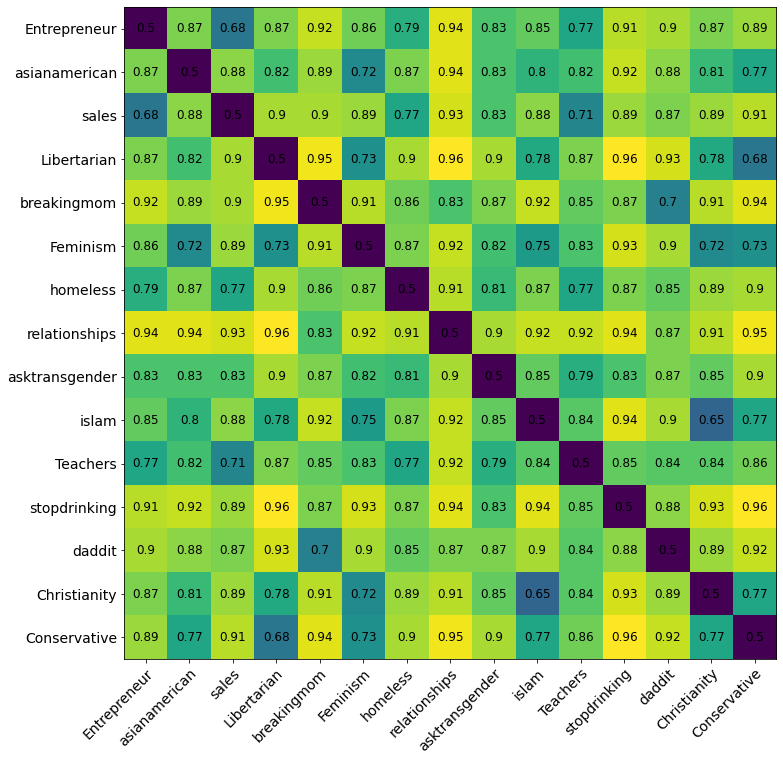

In [17]:
D = analysisdf.values
D=np.array(D, dtype=float)
D = np.round(D, 2)
identities = analysisdf.columns

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(D)

# We want to show all ticks...
ax.set_xticks(np.arange(len(identities)))
ax.set_yticks(np.arange(len(identities)))
# ... and label them with the respective identities
ax.set_xticklabels(identities,fontsize=14)
ax.set_yticklabels(identities, fontsize=14)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(identities)):
    for j in range(len(identities)):
        text = ax.text(j, i, D[i, j],
                       ha="center", va="center", color="black", fontsize=12)

plt.show()

Here, we should see a symmetrical heat map of the AUCs from the different identity pairs. To check they are symmetrical, run the code below. It should return True. 

In [18]:
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)
check_symmetric(D)



True

We can then print an elbow plot of the eigenvalues to see how many dimensions best fit the data.

Text(0.5, 1.0, 'Eigenvalues')

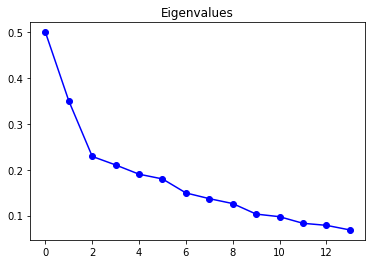

In [19]:
X, evals = mds(D, Q=2)
plt.plot(evals, 'bo-')
plt.title('Eigenvalues')

Next we can plot the MDS chart. 

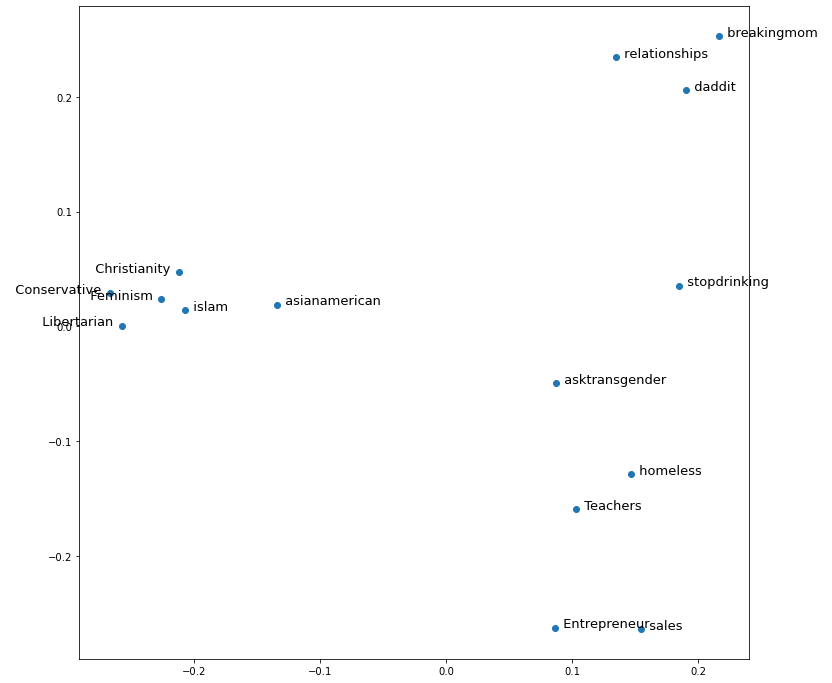

In [20]:
%matplotlib inline

plt.figure(figsize=(12, 12))
plt.scatter(*X.T)

labels = analysisdf.columns

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], '  %s  ' % labels[i],fontsize=13, 
         ha = 'left' if X[i,0] > -0.21 else 'right')

plt.show()



## Study 2 - Finding out the meaning of the axes

For the next step, we extract the co-ordinates of the identities on the MDS plot. The code below will give us a new dataframe with the MDS co-ordinates of the 15 identities/forums.

In [21]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [22]:
mdsdf = pd.DataFrame(columns=['dimension1','dimension2'])

unzipped = zip(*X)
unzipped= (list(unzipped))

mdsdf['dimension1'] = unzipped[0]
mdsdf['dimension2'] = unzipped[1]
mdsdf['Forum']=analysisdf.columns

Next, we must run the linguistic data through the values LIWC dictionary found at: https://osf.io/vt8nf. 

This will give a csvfile with each Reddit post and its percentage score for each of the 10 Schwarz values. 



In [23]:
post_values = pd.read_csv('Schwarz_values_posts.csv')
comment_values = pd.read_csv('Schwarz_values_comments.csv')

In [24]:
post_values

,Unnamed: 0,author,title,selftext,subreddit,url,Values_SE,Values_CO,Values_TR,Values_BE,Values_UN,Values_SD,Values_ST,Values_HE,Values_AC,Values_PO
0,0,sacred7skunk,Please comment,I was an unbeliever when jesus saved me from k...,Christianity,https://www.reddit.com/r/Christianity/comments...,0.00,1.89,5.66,0.00,0.94,1.89,0.00,0.00,0.00,0.00
1,1,skysudds,Holy Spirit Filled Dream A Few Nights Ago,Had a dream a few nights ago that is kind of h...,Christianity,https://www.reddit.com/r/Christianity/comments...,0.00,1.30,1.95,1.30,1.30,1.30,0.00,0.65,0.00,1.95
2,2,ThatNarrowPath96,I am realizing how sinful my heart is. How can...,I started giving up my willful sin and I reali...,Christianity,https://www.reddit.com/r/Christianity/comments...,2.79,0.56,1.68,1.12,0.00,0.00,0.00,0.00,0.00,0.00
3,3,roadierunway12,How to help a stubborn believer?,I really need advice from some fellow Christia...,Christianity,https://www.reddit.com/r/Christianity/comments...,0.56,0.00,2.79,5.03,0.00,0.56,0.00,0.00,0.00,0.00
4,4,patsfan4life17,He went to hell and saw his friends there,Testimony of Ron Regan who was given a glimpse...,Christianity,https://www.reddit.com/r/Christianity/comments...,0.00,0.00,3.64,3.64,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231256,231351,giovanikx,[Advice Request]How can I convince parents buy...,I'm developing an online programming course to...,daddit,https://www.reddit.com/r/daddit/comments/7pjjo...,0.00,1.45,0.00,4.35,0.00,4.35,0.00,0.00,2.17,0.00
231257,231352,ess_tee_you,Drinking 34-year-old whisky from a plastic cup...,Isn't having kids great?\n\nMy son is asleep i...,daddit,https://www.reddit.com/r/daddit/comments/89wqd...,1.75,0.00,0.00,0.00,0.00,1.75,1.75,1.75,0.00,0.00
231258,231353,parentingMI,Parenting Mental Illness - a new Discord chat ...,Hi all. I run a large mental health peer suppo...,daddit,https://www.reddit.com/r/daddit/comments/8a1d2...,0.68,0.00,0.00,4.11,0.68,0.68,0.00,0.00,0.00,0.00
231259,231354,something_squirrel,Real question: Is having a son kind of like ma...,"It's a kid who looks like your self, believes ...",daddit,https://www.reddit.com/r/daddit/comments/8a1me...,0.00,0.00,0.00,2.44,0.00,1.22,0.00,0.00,2.44,0.00


In [25]:
allvalues = ['Values_SE', 'Values_CO', 'Values_TR', 
             'Values_BE', 'Values_UN', 'Values_SD', 'Values_ST', 'Values_HE',
       'Values_AC', 'Values_PO','subreddit']

df = pd.concat([post_values[allvalues], comment_values[allvalues]])




We then calculate the mean of each value per subreddit and rename the data so that it is more accessible.

In [26]:
mean = df.groupby('subreddit').mean().reset_index()
mean.rename(columns={'subreddit':'Forum','Values_SE':'security', 'Values_CO':'conformity', 'Values_TR':'tradition', 'Values_BE':'benevolence',
       'Values_UN':'universalism', 'Values_SD':'self-direction', 'Values_ST':'stimulation', 'Values_HE':'hedonism', 'Values_AC':'achievement',
       'Values_PO':'power' }, inplace=True)

In [27]:
mean

,Forum,security,conformity,tradition,benevolence,universalism,self-direction,stimulation,hedonism,achievement,power
0,Christianity,0.253224,0.545129,3.127563,0.885953,0.651999,1.216643,0.263441,0.299438,0.356992,0.430972
1,Conservative,0.335997,0.787878,0.267993,0.586572,0.760393,1.079586,0.256666,0.264754,0.550843,0.673472
2,Entrepreneur,0.188571,0.348817,0.123871,0.779024,0.464614,1.291451,0.353722,0.171882,1.597971,0.859257
3,Feminism,0.318594,0.567907,0.221062,0.750261,0.782681,1.194691,0.341991,0.471216,0.576748,0.557970
4,Libertarian,0.406848,0.832760,0.223449,0.533787,0.864255,1.248157,0.259916,0.209057,0.614122,1.032788
5,Teachers,0.233708,0.442847,0.088430,0.912885,0.354813,1.163171,0.285554,0.236223,0.984688,0.441155
6,asianamerican,0.183743,0.377066,0.211103,0.840788,0.641623,1.045841,0.323897,0.297343,0.522475,0.478375
7,asktransgender,0.263987,0.365750,0.104745,1.067442,0.421583,0.922166,0.325060,0.413223,0.540028,0.401008
8,breakingmom,0.290056,0.273641,0.137106,1.423563,0.227690,0.721860,0.201372,0.330712,0.520619,0.328334
9,daddit,0.264274,0.245667,0.106420,1.494871,0.242694,0.726548,0.239609,0.389892,0.591294,0.294226


Next we add the MDS co-ordinates to the datafile. 

In [28]:
values_mdscoords = pd.merge(mean, mdsdf, on='Forum')

In [29]:
values_mdscoords

,Forum,security,conformity,tradition,benevolence,universalism,self-direction,stimulation,hedonism,achievement,power,dimension1,dimension2
0,Christianity,0.253224,0.545129,3.127563,0.885953,0.651999,1.216643,0.263441,0.299438,0.356992,0.430972,-0.211983,0.047395
1,Conservative,0.335997,0.787878,0.267993,0.586572,0.760393,1.079586,0.256666,0.264754,0.550843,0.673472,-0.266525,0.029067
2,Entrepreneur,0.188571,0.348817,0.123871,0.779024,0.464614,1.291451,0.353722,0.171882,1.597971,0.859257,0.086470,-0.262486
3,Feminism,0.318594,0.567907,0.221062,0.750261,0.782681,1.194691,0.341991,0.471216,0.576748,0.557970,-0.225743,0.024059
4,Libertarian,0.406848,0.832760,0.223449,0.533787,0.864255,1.248157,0.259916,0.209057,0.614122,1.032788,-0.257078,0.000601
5,Teachers,0.233708,0.442847,0.088430,0.912885,0.354813,1.163171,0.285554,0.236223,0.984688,0.441155,0.103103,-0.159241
6,asianamerican,0.183743,0.377066,0.211103,0.840788,0.641623,1.045841,0.323897,0.297343,0.522475,0.478375,-0.134206,0.018933
7,asktransgender,0.263987,0.365750,0.104745,1.067442,0.421583,0.922166,0.325060,0.413223,0.540028,0.401008,0.086764,-0.049493
8,breakingmom,0.290056,0.273641,0.137106,1.423563,0.227690,0.721860,0.201372,0.330712,0.520619,0.328334,0.215909,0.253053
9,daddit,0.264274,0.245667,0.106420,1.494871,0.242694,0.726548,0.239609,0.389892,0.591294,0.294226,0.189876,0.205963


In [30]:
values = ['achievement','benevolence','conformity','hedonism','power','self-direction','security','stimulation','tradition','universalism']
X = values_mdscoords[['dimension1', 'dimension2']]
for v in values:
    X2 = sm.add_constant(X)
    est = sm.OLS(values_mdscoords[v], X2)
    est2 = est.fit()
    print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            achievement   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     18.69
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           0.000206
Time:                        17:52:15   Log-Likelihood:                 3.2678
No. Observations:                  15   AIC:                           -0.5357
Df Residuals:                      12   BIC:                             1.588
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7325      0.056     13.040      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  w

## Study 3

For study 3, we collected 9 years worth of Reddit data from the asktransgender subreddit. 

In [31]:
asktrans = pd.read_csv('asktransgender_data.csv')

In [34]:
fourteen_identities_test = testdata.loc[testdata['subreddit']!= 'asktransgender']
fourteen_identities_train = traindata.loc[traindata['subreddit']!= 'asktransgender']

In [35]:
def split_years(df):
    return [df[df['year'] == y] for y in df['year'].unique()]

trans_data = split_years(asktrans)

In [38]:
def run_classifier_trans(train1, train2, test1, test2):
    
    print(len(train1), len(train2), len(test1),len(test2))
    t = np.ones((train1.shape[0]+train2.shape[0]))
    t[:train1.shape[0]] = 0

    X = np.vstack((train1.values, 
            train2.values))
    X.shape, train1.shape, train2.shape
    
    t1 = np.ones((test1.shape[0]+test2.shape[0]))
    t1[:test1.shape[0]] = 0

    t2 = np.vstack((test1.values, 
            test2.values))
    t2.shape, test1.shape, test2.shape

    et = ExtraTreesClassifier(n_estimators=300, max_depth=None, 
                              min_samples_split=2, random_state=8, 
                              n_jobs=-1)

    scores = ['accuracy', 'roc_auc']

    for score in scores:
        result = cross_val_score(et, X, t, cv=5, scoring=score)
        print("ExtraTrees for %s" % score)
        print("%0.3f (+/-%0.03f)" % (np.mean(result), np.std(result)*2))

    print(X.shape)
    et.fit(X, t)
    s_train = et.predict_proba(X)

    y_true, y_pred = t1, et.predict(t2)
    s = et.predict_proba(t2)[:,1]
    print(classification_report(y_true, y_pred))
    print()


    fpr, tpr, thresholds = roc_curve(y_true, s)
    auc = roc_auc_score(y_true, s)
    acc = accuracy_score(y_true, y_pred)
    print('ExtraTrees  AUC %g   Accuracy %g' % (auc, acc))
    return auc

In [43]:
identities = list(fourteen_identities_test.subreddit.unique())
aucs=[]
allstyle = ['WPS', 'Sixltr','i', 'we', 'you', 'shehe', 'they', 'ipron',
       'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb',
       'adj', 'compare', 'interrog', 'number', 'quant', 'affect','insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ','see', 'hear',
       'feel', 'focuspast',
       'focuspresent', 'focusfuture', 'motion', 'space',
       'time','swear', 'netspeak', 'assent', 'nonflu', 'filler']

for t in trans_data: 
    t=t.sample(frac=1, random_state=14)
    ttest=t[:test_train_size]
    ttrain=t[test_train_size:test_train_size*2]
    for x in identities:
        training = fourteen_identities_train.loc[fourteen_identities_train['subreddit']==x]
        testing = fourteen_identities_test.loc[fourteen_identities_test['subreddit']==x]
        print (ttest.year.unique(), x)
        auc = run_classifier_trans(ttrain[allstyle], training[allstyle], ttest[allstyle], testing[allstyle])
        aucs.append(auc)
        

[2015] Entrepreneur
4136 4136 4135 4135
ExtraTrees for accuracy
0.742 (+/-0.013)
ExtraTrees for roc_auc
0.825 (+/-0.007)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75      4135
         1.0       0.74      0.75      0.75      4135

    accuracy                           0.75      8270
   macro avg       0.75      0.75      0.75      8270
weighted avg       0.75      0.75      0.75      8270


ExtraTrees  AUC 0.826179   Accuracy 0.747763
[2015] asianamerican
4136 4135 4135 4135
ExtraTrees for accuracy
0.755 (+/-0.015)
ExtraTrees for roc_auc
0.831 (+/-0.012)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76      4135
         1.0       0.76      0.73      0.74      4135

    accuracy                           0.75      8270
   macro avg       0.75      0.75      0.75      8270
weighted avg       0.75      0.75      0.75      8270


ExtraTrees  AUC 0.831069   Accurac

ExtraTrees for accuracy
0.812 (+/-0.025)
ExtraTrees for roc_auc
0.893 (+/-0.021)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      4135
         1.0       0.80      0.84      0.82      4135

    accuracy                           0.81      8270
   macro avg       0.81      0.81      0.81      8270
weighted avg       0.81      0.81      0.81      8270


ExtraTrees  AUC 0.891128   Accuracy 0.811971
[2016] breakingmom
4136 4136 4135 4135
ExtraTrees for accuracy
0.771 (+/-0.034)
ExtraTrees for roc_auc
0.851 (+/-0.033)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78      4135
         1.0       0.79      0.76      0.77      4135

    accuracy                           0.78      8270
   macro avg       0.78      0.78      0.78      8270
weighted avg       0.78      0.78      0.78      8270


ExtraTrees  AUC 0.852104   Accuracy 0.777872
[2016] Feminism
4136 4134 4135 

ExtraTrees for accuracy
0.722 (+/-0.016)
ExtraTrees for roc_auc
0.794 (+/-0.017)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      4135
         1.0       0.73      0.71      0.72      4135

    accuracy                           0.72      8270
   macro avg       0.72      0.72      0.72      8270
weighted avg       0.72      0.72      0.72      8270


ExtraTrees  AUC 0.80057   Accuracy 0.724667
[2011] relationships
4136 4136 4135 4135
ExtraTrees for accuracy
0.827 (+/-0.024)
ExtraTrees for roc_auc
0.898 (+/-0.022)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      4135
         1.0       0.85      0.79      0.82      4135

    accuracy                           0.83      8270
   macro avg       0.83      0.83      0.83      8270
weighted avg       0.83      0.83      0.83      8270


ExtraTrees  AUC 0.900752   Accuracy 0.828174
[2011] islam
4136 4136 4135 41

ExtraTrees for accuracy
0.719 (+/-0.015)
ExtraTrees for roc_auc
0.790 (+/-0.020)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      4135
         1.0       0.71      0.70      0.71      4135

    accuracy                           0.71      8270
   macro avg       0.71      0.71      0.71      8270
weighted avg       0.71      0.71      0.71      8270


ExtraTrees  AUC 0.783519   Accuracy 0.708706
[2014] stopdrinking
4136 4136 4135 4135
ExtraTrees for accuracy
0.738 (+/-0.031)
ExtraTrees for roc_auc
0.818 (+/-0.036)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      4135
         1.0       0.74      0.74      0.74      4135

    accuracy                           0.74      8270
   macro avg       0.74      0.74      0.74      8270
weighted avg       0.74      0.74      0.74      8270


ExtraTrees  AUC 0.81667   Accuracy 0.741596
[2014] daddit
4136 4135 4135 41

ExtraTrees for accuracy
0.781 (+/-0.033)
ExtraTrees for roc_auc
0.859 (+/-0.038)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      4135
         1.0       0.78      0.77      0.78      4135

    accuracy                           0.78      8270
   macro avg       0.78      0.78      0.78      8270
weighted avg       0.78      0.78      0.78      8270


ExtraTrees  AUC 0.856093   Accuracy 0.780048
[2013] Conservative
4136 4136 4135 4135
ExtraTrees for accuracy
0.826 (+/-0.020)
ExtraTrees for roc_auc
0.904 (+/-0.020)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      4135
         1.0       0.83      0.84      0.83      4135

    accuracy                           0.83      8270
   macro avg       0.83      0.83      0.83      8270
weighted avg       0.83      0.83      0.83      8270


ExtraTrees  AUC 0.910355   Accuracy 0.833253
[2012] Entrepreneur
4136 4136 

ExtraTrees for accuracy
0.758 (+/-0.020)
ExtraTrees for roc_auc
0.831 (+/-0.014)
(8271, 41)
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      4135
         1.0       0.75      0.73      0.74      4135

    accuracy                           0.75      8270
   macro avg       0.75      0.75      0.75      8270
weighted avg       0.75      0.75      0.75      8270


ExtraTrees  AUC 0.827368   Accuracy 0.746675
[2018] sales
4136 4136 4135 4135
ExtraTrees for accuracy
0.745 (+/-0.016)
ExtraTrees for roc_auc
0.823 (+/-0.024)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75      4135
         1.0       0.75      0.74      0.74      4135

    accuracy                           0.75      8270
   macro avg       0.75      0.75      0.75      8270
weighted avg       0.75      0.75      0.75      8270


ExtraTrees  AUC 0.825224   Accuracy 0.745466
[2018] Libertarian
4136 4135 4135 413

ExtraTrees for accuracy
0.770 (+/-0.036)
ExtraTrees for roc_auc
0.846 (+/-0.031)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      4135
         1.0       0.80      0.76      0.78      4135

    accuracy                           0.79      8270
   macro avg       0.79      0.79      0.79      8270
weighted avg       0.79      0.79      0.79      8270


ExtraTrees  AUC 0.859456   Accuracy 0.785248
[2017] Feminism
4136 4134 4135 4135
ExtraTrees for accuracy
0.735 (+/-0.021)
ExtraTrees for roc_auc
0.806 (+/-0.029)
(8270, 41)
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      4135
         1.0       0.74      0.74      0.74      4135

    accuracy                           0.74      8270
   macro avg       0.74      0.74      0.74      8270
weighted avg       0.74      0.74      0.74      8270


ExtraTrees  AUC 0.811579   Accuracy 0.741838
[2017] homeless
4136 4135 4135 413

ExtraTrees for accuracy
0.829 (+/-0.019)
ExtraTrees for roc_auc
0.901 (+/-0.014)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83      4135
         1.0       0.84      0.80      0.82      4135

    accuracy                           0.82      8270
   macro avg       0.82      0.82      0.82      8270
weighted avg       0.82      0.82      0.82      8270


ExtraTrees  AUC 0.894607   Accuracy 0.822491
[2019] islam
4136 4136 4135 4135
ExtraTrees for accuracy
0.768 (+/-0.030)
ExtraTrees for roc_auc
0.847 (+/-0.045)
(8272, 41)
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      4135
         1.0       0.77      0.77      0.77      4135

    accuracy                           0.77      8270
   macro avg       0.77      0.77      0.77      8270
weighted avg       0.77      0.77      0.77      8270


ExtraTrees  AUC 0.851374   Accuracy 0.770738
[2019] Teachers
4136 4136 4135 4135
E

Now we know how each year of trans data compares to each of our 14 identities, the next stage is to create a dataframe with this data in it, and then plot these pairwise comparisons on the original MDS plot. 

In [45]:
trans_results = pd.DataFrame(columns = ['transyear'])
trans_results['transyear']= [2015,2016,2011,2014,2013,2012,2018,2017,2019]
for x in identities:
    trans_results[x]=0
a=0
while a < len(aucs):
    for i in range(0,9):
        for x in identities:
            trans_results.loc[i,x] = aucs[a]
            a+=1


In [46]:
trans_results

,transyear,Entrepreneur,asianamerican,sales,Libertarian,breakingmom,Feminism,homeless,relationships,islam,Teachers,stopdrinking,daddit,Christianity,Conservative
0,2015,0.826179,0.831069,0.818938,0.900489,0.855613,0.817390,0.797146,0.885351,0.847414,0.782174,0.822256,0.859208,0.852445,0.904395
1,2016,0.818096,0.820624,0.806897,0.891128,0.852104,0.814018,0.787856,0.885463,0.840040,0.776246,0.814255,0.850786,0.845508,0.897610
2,2011,0.819394,0.824937,0.824982,0.891397,0.883483,0.811822,0.800570,0.900752,0.838558,0.798133,0.839898,0.875318,0.851843,0.902032
3,2014,0.826727,0.831944,0.813913,0.906756,0.859351,0.824572,0.793646,0.889421,0.855490,0.783519,0.816670,0.859332,0.857338,0.907462
4,2013,0.817823,0.835631,0.815924,0.902088,0.862879,0.825164,0.796139,0.885721,0.848091,0.795028,0.821001,0.862911,0.856093,0.910355
5,2012,0.815053,0.837832,0.816347,0.903467,0.865747,0.830118,0.792759,0.886379,0.849534,0.790699,0.829426,0.861672,0.861023,0.909781
6,2018,0.830003,0.827368,0.825224,0.890196,0.868814,0.806410,0.809227,0.893526,0.840039,0.792562,0.831168,0.870020,0.847380,0.898361
7,2017,0.825996,0.825178,0.815418,0.893659,0.859456,0.811579,0.800810,0.885139,0.845600,0.781194,0.812743,0.857930,0.847557,0.898778
8,2019,0.835671,0.841555,0.831715,0.903175,0.878121,0.826123,0.817879,0.894607,0.851374,0.802372,0.843614,0.875088,0.859500,0.907573


In [48]:
fourteenids = analysisdf.drop('asktransgender', axis=1)
fourteenids.drop('asktransgender', inplace=True)

In [49]:
fourteenids

,Entrepreneur,asianamerican,sales,Libertarian,breakingmom,Feminism,homeless,relationships,islam,Teachers,stopdrinking,daddit,Christianity,Conservative
Entrepreneur,0.5,0.865508,0.683201,0.871561,0.922848,0.861153,0.791601,0.939392,0.852315,0.773329,0.905138,0.896929,0.874301,0.888065
asianamerican,0.865508,0.5,0.881948,0.823186,0.894622,0.719864,0.865501,0.935006,0.803261,0.817302,0.918786,0.878128,0.808999,0.766936
sales,0.683201,0.881948,0.5,0.900694,0.898784,0.88689,0.76585,0.932824,0.876367,0.712334,0.885313,0.87321,0.891216,0.91055
Libertarian,0.871561,0.823186,0.900694,0.5,0.949071,0.727972,0.897708,0.957066,0.784099,0.871427,0.962286,0.933945,0.775661,0.682714
breakingmom,0.922848,0.894622,0.898784,0.949071,0.5,0.905854,0.856371,0.829875,0.920866,0.846942,0.871533,0.699906,0.910528,0.937763
Feminism,0.861153,0.719864,0.88689,0.727972,0.905854,0.5,0.868703,0.915449,0.745288,0.82707,0.932396,0.899448,0.724704,0.732267
homeless,0.791601,0.865501,0.76585,0.897708,0.856371,0.868703,0.5,0.90963,0.873688,0.765177,0.872613,0.849966,0.889205,0.899026
relationships,0.939392,0.935006,0.932824,0.957066,0.829875,0.915449,0.90963,0.5,0.916571,0.915116,0.938585,0.874652,0.914898,0.953079
islam,0.852315,0.803261,0.876367,0.784099,0.920866,0.745288,0.873688,0.916571,0.5,0.841172,0.935137,0.902271,0.654194,0.773702
Teachers,0.773329,0.817302,0.712334,0.871427,0.846942,0.82707,0.765177,0.915116,0.841172,0.5,0.852102,0.835951,0.844716,0.860449


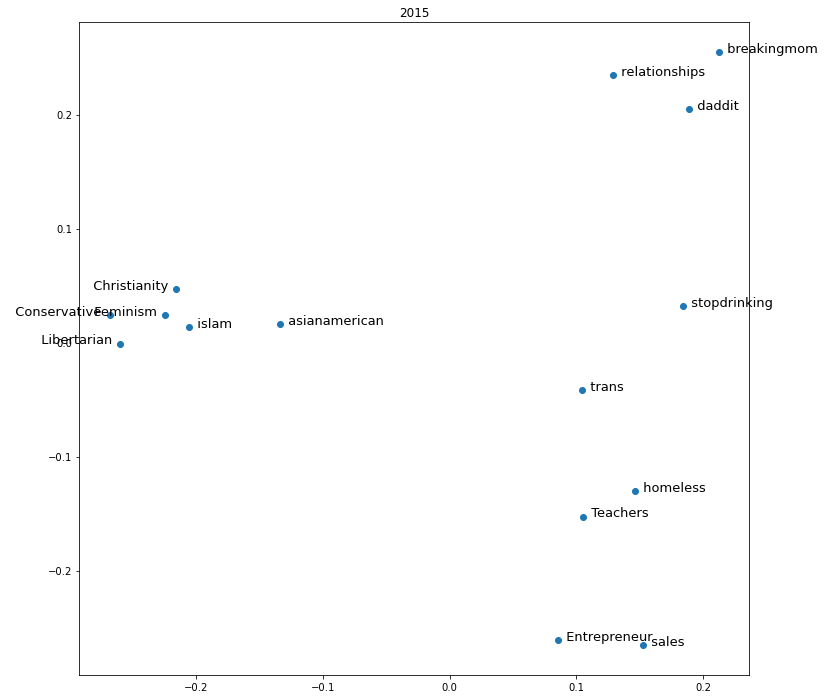

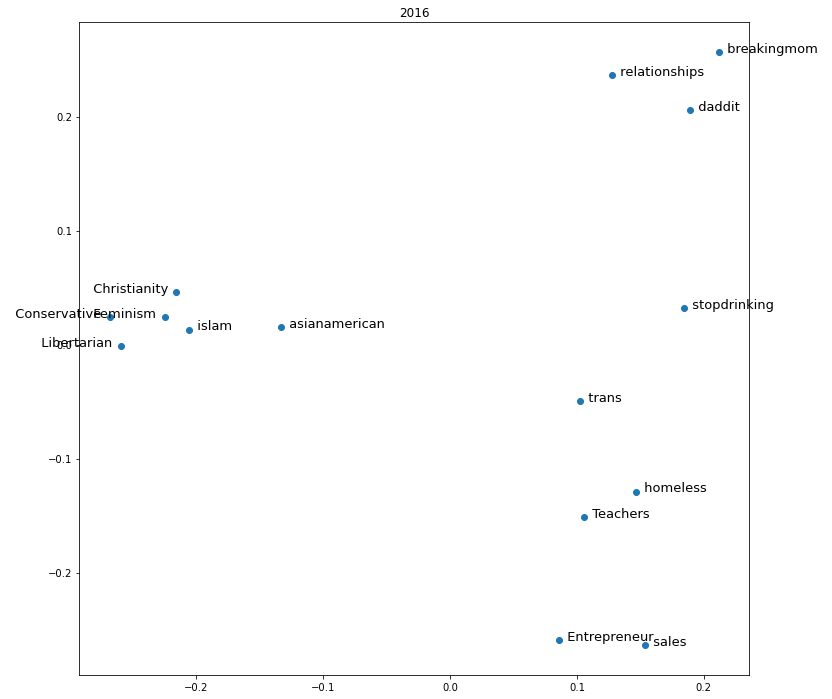

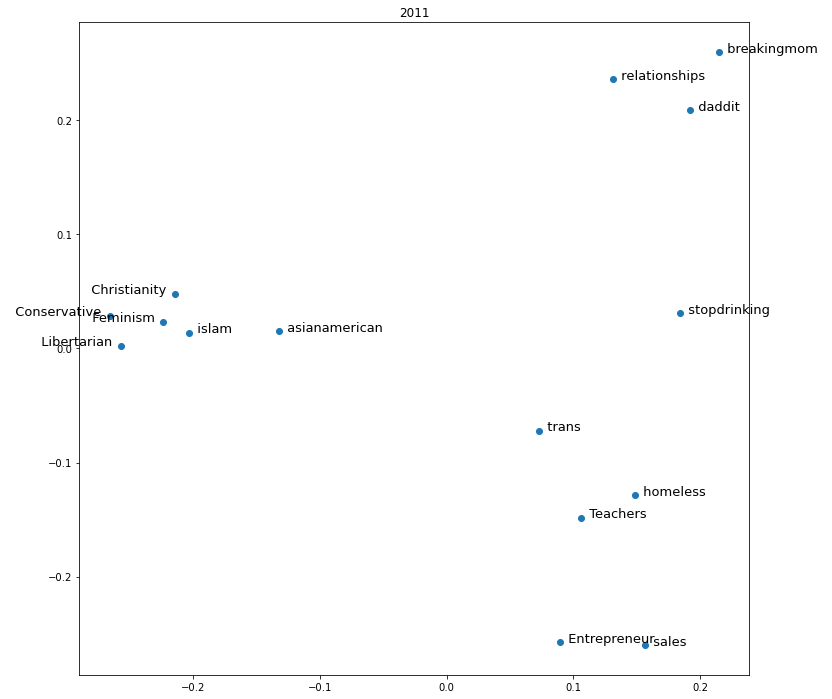

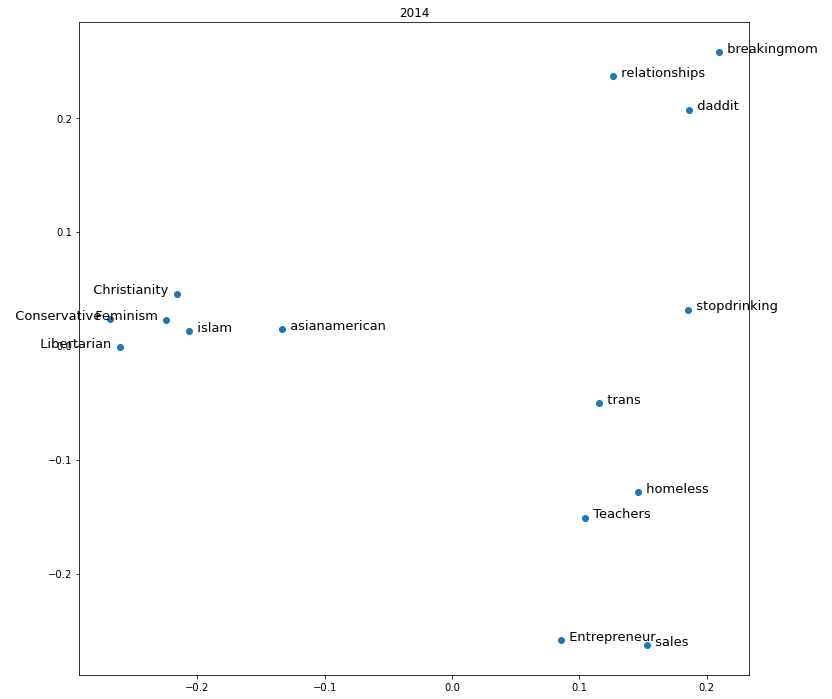

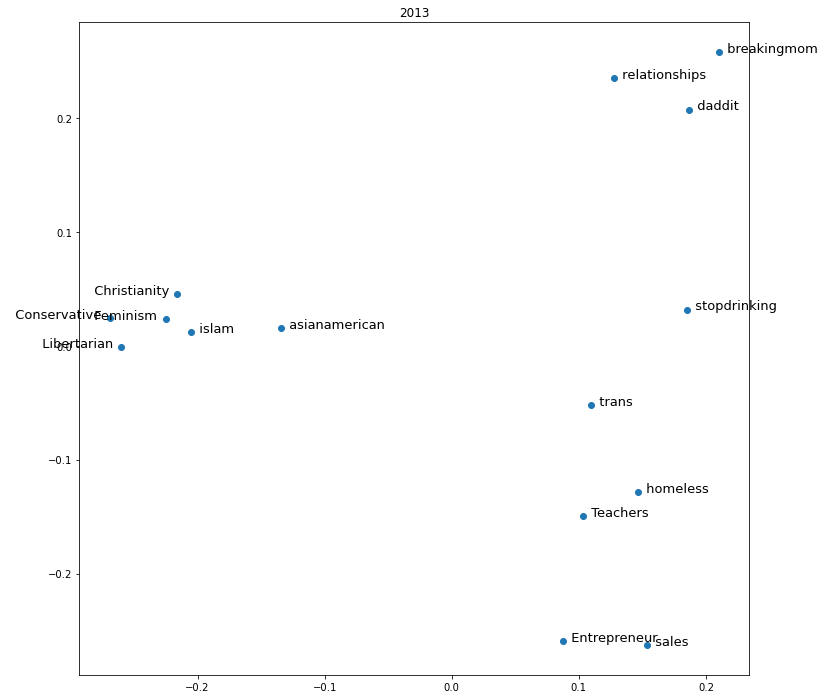

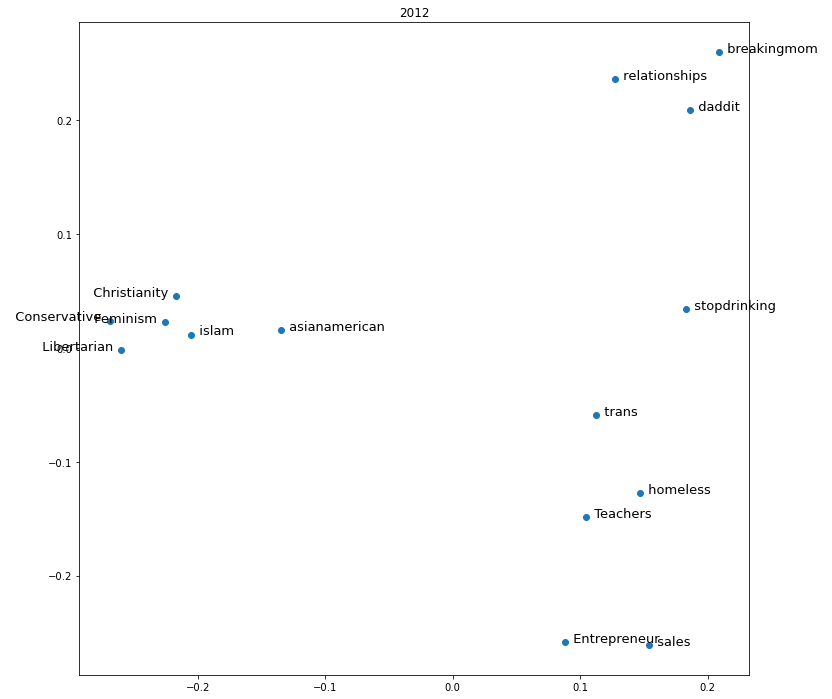

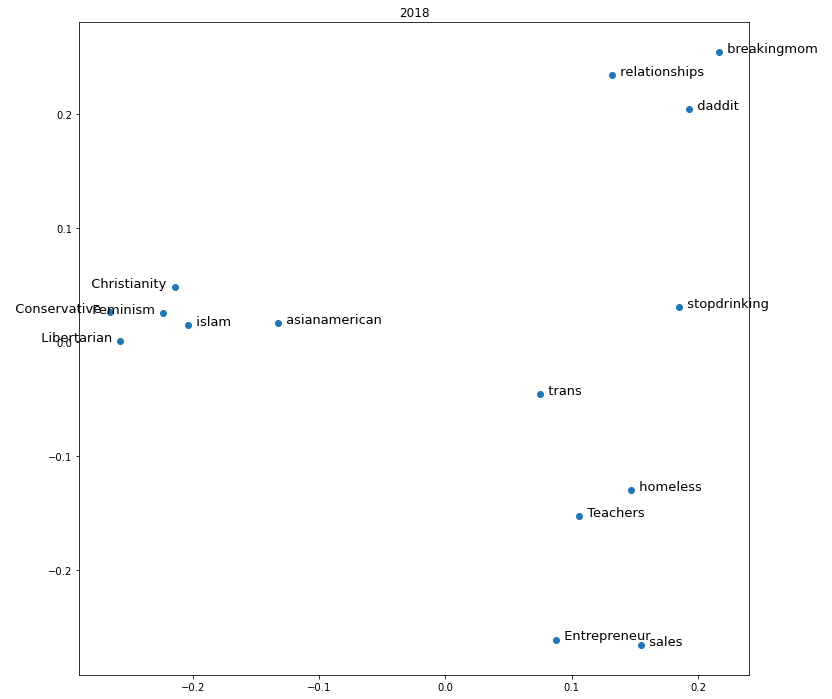

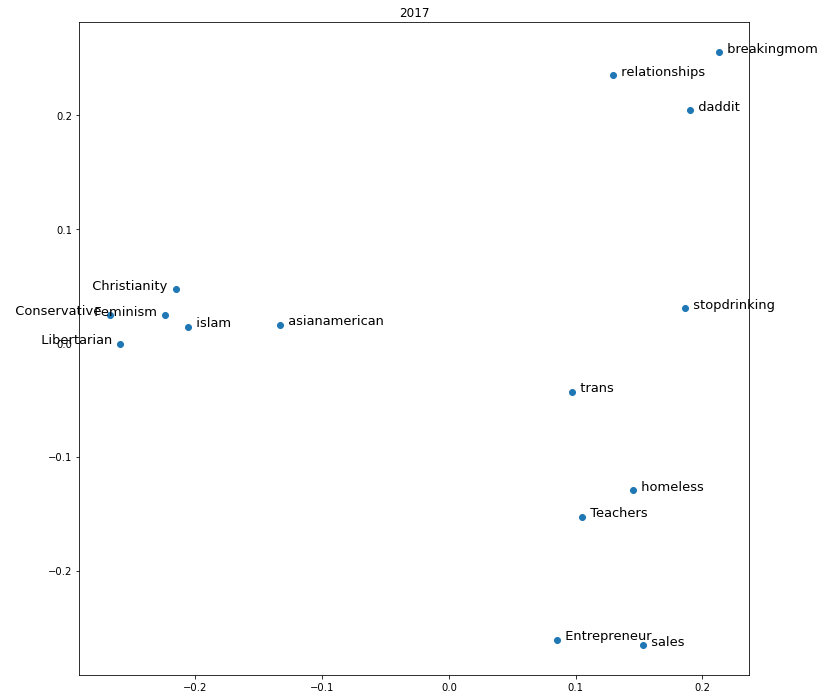

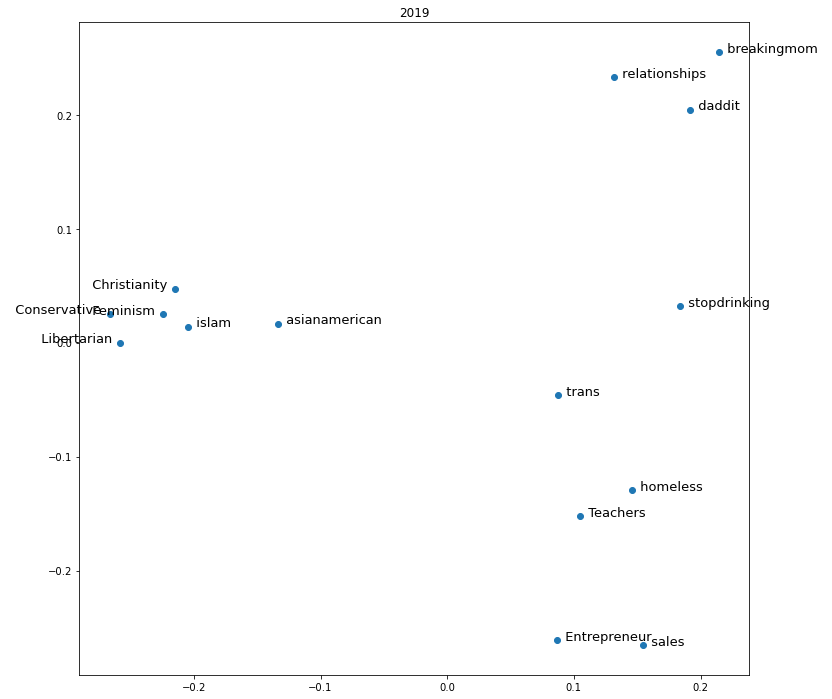

In [51]:
transcoords=[]
years=[2015,2016,2011,2014,2013,2012,2018,2017,2019]
for ab in range(0,9):
    fourteenids['trans'] = trans_results.iloc[ab,:]
    fourteenids.loc['trans'] = fourteenids['trans']
    D = fourteenids.values
    D=np.array(D, dtype=float)
    np.fill_diagonal(D, 0.5)
    X, evals = mds(D, Q=2)
    plt.figure(figsize=(12, 12))
    plt.scatter(*X.T)

    labels = fourteenids.columns

    for i in range(X.shape[0]): 
        plt.text(X[i,0], X[i,1], '  %s  ' % labels[i],fontsize=13, 
            ha = 'left' if X[i,0] > -0.21 else 'right')
    plt.title(years[ab])
    transcoords.append(X[14])
    plt.show()

In [61]:
trans_coords = pd.DataFrame(transcoords, columns=["dimension1", "dimension2"])
trans_coords['Forum']=years
trans_coords['Forum']= 'trans' + trans_coords['Forum'].astype(str)


In [62]:
trans_coords

,dimension1,dimension2,Forum
0,0.104420,-0.041625,trans2015
1,0.102054,-0.049573,trans2016
2,0.072600,-0.072066,trans2011
3,0.115057,-0.050464,trans2014
4,0.109227,-0.052278,trans2013
5,0.112157,-0.059054,trans2012
6,0.075291,-0.045697,trans2018
7,0.096859,-0.042743,trans2017
8,0.087242,-0.046203,trans2019


In [64]:
fourteenmdscoords = mdsdf.drop(8)

In [65]:
total_mdscoords = pd.concat([fourteenmdscoords, trans_coords])

In [66]:
total_mdscoords

,dimension1,dimension2,Forum
0,0.086470,-0.262486,Entrepreneur
1,-0.134206,0.018933,asianamerican
2,0.154543,-0.263847,sales
3,-0.257078,0.000601,Libertarian
4,0.215909,0.253053,breakingmom
5,-0.225743,0.024059,Feminism
6,0.146674,-0.128449,homeless
7,0.134460,0.234752,relationships
9,-0.206813,0.014139,islam
10,0.103103,-0.159241,Teachers


In [67]:

total_mdscoords['hue'] = [1.0, 1.0,1.0, 1.0,1.0, 1.0,1.0, 
                          1.0,1.0, 1.0,1.0, 1.0,1.0, 1.0,
                         6.0, 7.0, 2.0, 5.0, 4.0, 3.0, 9.0, 
                          8.0, 10.0]

colors = ["#1C2833",
            '#C0392B',
            '#E74C3C',
            '#9B59B6',
            '#8E44AD',
            '#2980B9',
            '#3498DB',
          '#1ABC9C',
          '#16A085',
          '#196F3D']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


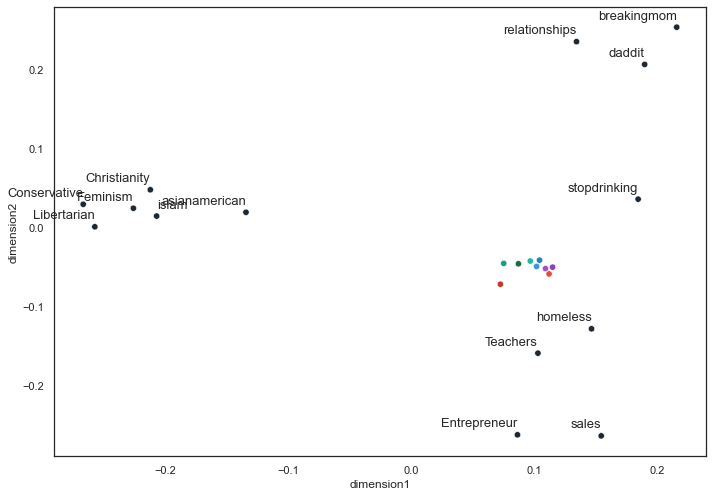

In [72]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('white')
ax = sns.scatterplot('dimension1', # Horizontal axis
           'dimension2', # Vertical axis
           data=total_mdscoords,
            hue = 'hue',
            palette=colors,
            s=40,
            legend=False
                     
                    )                     


for i, point in total_mdscoords[:14].iterrows():
    ax.text(point['dimension1'], point['dimension2']+0.01, point['Forum'] ,fontsize=13, 
            ha = 'left' if point['Forum'] == 'islam' else 'right')
        